In [49]:
# Import the needed Libraries 
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
# Getting the data frame
df =  web.DataReader('INDIGO.BO', data_source='yahoo', start='2012-01-01', end='2022-02-19')

# Showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-10,898.000000,848.099976,856.000000,878.450012,5066114.0,832.729553
2015-11-13,1032.699951,918.000000,921.000000,1003.250000,1679120.0,951.034119
2015-11-16,1039.500000,965.450012,1009.000000,987.599976,836121.0,936.198608
2015-11-17,1049.000000,977.000000,990.000000,1035.099976,753676.0,981.226318
2015-11-18,1067.650024,1015.000000,1021.000000,1044.400024,791693.0,990.042419
...,...,...,...,...,...,...
2022-02-14,2227.600098,2085.100098,2210.000000,2091.300049,58209.0,2091.300049
2022-02-15,2196.949951,2072.550049,2167.000000,2190.500000,46183.0,2190.500000
2022-02-16,2223.000000,2153.850098,2205.000000,2171.449951,29198.0,2171.449951


In [51]:
# Getting the number of Rows and Columns in our data set
df.shape

(1550, 6)

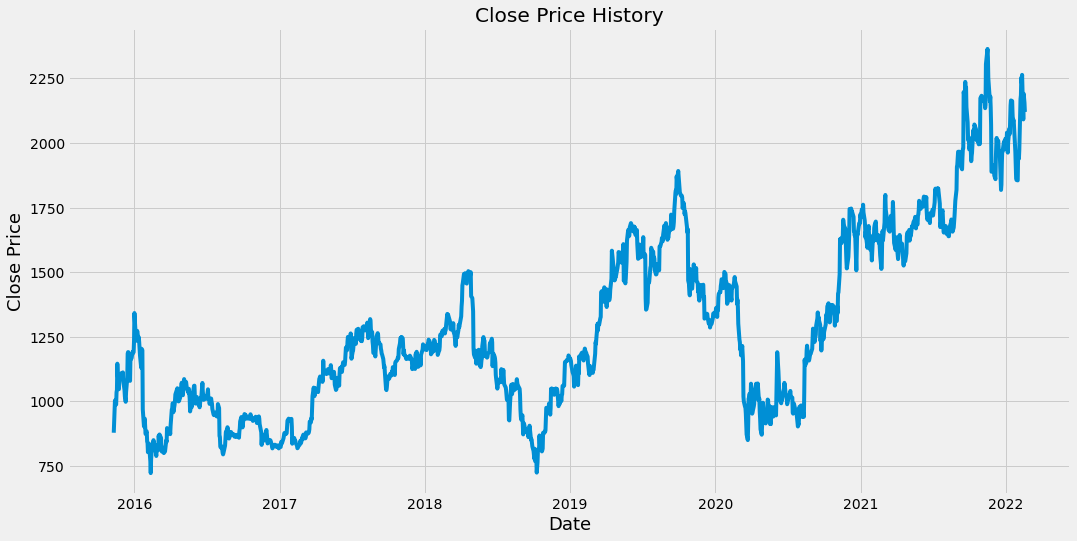

In [52]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close' ])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [53]:
# Create a Data frame with only 'Close' Column
data = df.filter(['Close'])

# Convert the data frame into a numpy array
dataset = data.values

# Get the number of rows to train our model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1240

In [54]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09513949],
       [0.17115361],
       [0.16162137],
       ...,
       [0.88268967],
       [0.87294427],
       [0.85153491]])

In [55]:
#  Create the training data set
#  Create the scaled training data set

train_data = scaled_data[0:training_data_len, :] 

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(x_train)
        print()
        print(y_train)


[array([0.09513949, 0.17115361, 0.16162137, 0.19055303, 0.19621758,
       0.25794859, 0.23258007, 0.19786208, 0.22246923, 0.22329149,
       0.22332197, 0.23626508, 0.2264283 , 0.22962601, 0.23739188,
       0.21622609, 0.1961262 , 0.17998538, 0.17556949, 0.16810817,
       0.19094895, 0.22460104, 0.28155073, 0.28520525, 0.28505298,
       0.25612132, 0.21744426, 0.26952125, 0.27972347, 0.26921671,
       0.28642343, 0.28337799, 0.2855098 , 0.31170056, 0.37732975,
       0.32875502, 0.32433913, 0.31200511, 0.32312096, 0.33530271,
       0.31550736, 0.32038006, 0.3088074 , 0.29312339, 0.27728712,
       0.24850773, 0.29312339, 0.29160067, 0.28946887, 0.15014009,
       0.11009258, 0.12821293, 0.1116153 , 0.09227677, 0.09821537,
       0.07415641, 0.07172006, 0.04918382, 0.07004507, 0.06106103])]

[0.04035205142507309]
[array([0.09513949, 0.17115361, 0.16162137, 0.19055303, 0.19621758,
       0.25794859, 0.23258007, 0.19786208, 0.22246923, 0.22329149,
       0.22332197, 0.23626508, 0.22

In [56]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [57]:
# Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1180, 60, 1)

In [58]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [60]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1180/1180 [==============================] - 40s 31ms/step - loss: 0.0021


In [61]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60 : , :]

# Create the Data Sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])
    

In [62]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [63]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
# Get the model's predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [65]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

98.64587638608872

<ipython-input-66-2c706079815c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


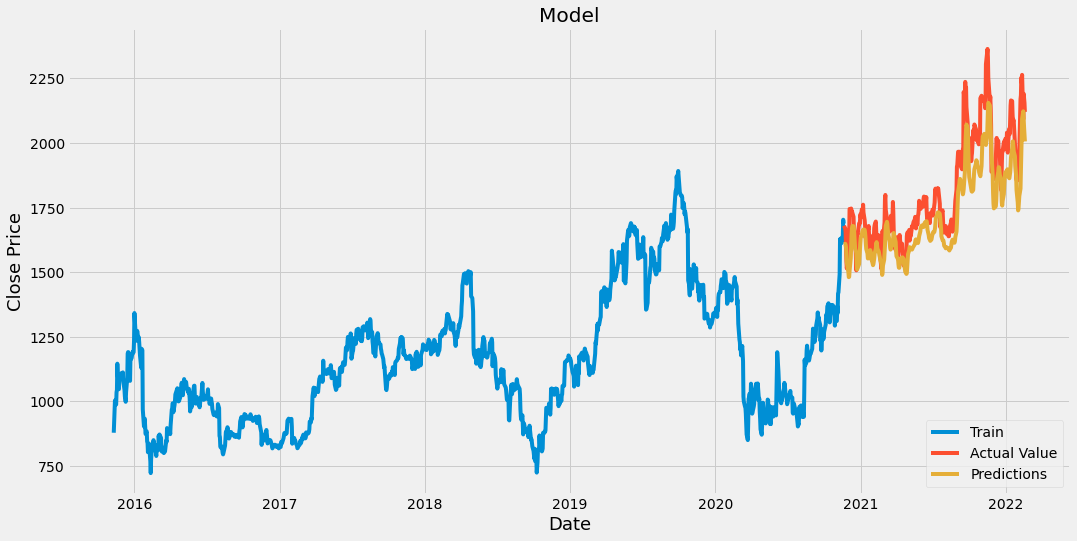

In [66]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [67]:
#  Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2020-11-20,1679.599976,1607.537354
2020-11-23,1669.650024,1609.923218
2020-11-24,1656.449951,1606.120605
2020-11-25,1591.000000,1597.073486
2020-11-26,1543.949951,1572.890381
...,...,...
2022-02-14,2091.300049,2122.708252
2022-02-15,2190.500000,2088.075684
2022-02-16,2171.449951,2059.129639


In [68]:
# Get the quote 
apple_quote = web.DataReader('INDIGO.BO', data_source='yahoo', start='2012-01-01', end='2022-02-19')

# Create a new data frame

new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list 
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array 
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[1978.9076]]
